# Retrieve-Argumented Generation (RAG)

En modelos de generación de texto, RAG es una técnica avanzada en NLP que combina la capacidad del modelo de recuperar información relevante de la base de datos con la capacidad de brindar respuestas eficientes.

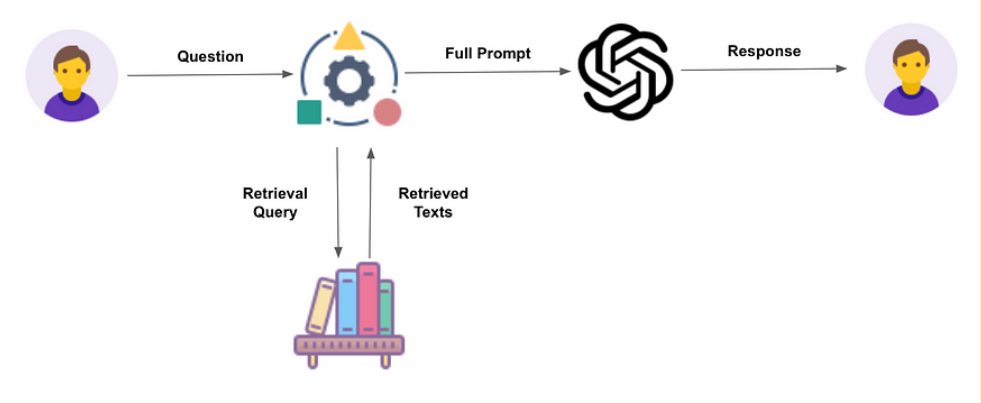

#### Lab

1. Import openAI dependences (load with conda install openai)

In [5]:

#Import openAI dependences (module)
import openai
import json

2. Use the API Key from openAI page

In [6]:
#Add our API Key copied from openAI page
openai.api_key = "" #Example -> dw-bQyr9128F49VJRNKAnST32lbkFJ2Zv4qEhWo4R0Xh6yrh15

3 Make a funcion calling (def)

In [8]:
def get_recomendation_series(recomendation_quantity):
    # Welcome print
    print("¡Hola! Vamos a recomendarte algunas series. Responde las siguientes preguntas:")

    # Ask for a category
    category = input("1. ¿Cuál es tu género favorito (drama, comedia, ciencia ficción, etc.)? ")

    # Ask for a episode_time
    episode_time = input("2. ¿Prefieres series con episodios cortos o largos? ")

    # Ask for a tone
    tone = input("3. ¿Te gustan las series con un tono ligero u oscuro? ")

    
    # Formatea las respuestas en un prompt para la API de OpenAI
    prompt = f"Recomienda una serie de {category} con episodios {episode_time} y tono {tone}."

    conversation = [{"role": "user", "content": prompt}] # One request

    # Make the request
    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=conversation,
        max_tokens=500
    )

    # Obtiene la recomendación
    recomendation = response.choices[0]['message']

    # Make a request to get 5 reviews with the params
    recomendations = []
    for _ in range(recomendation_quantity):
        response = openai.ChatCompletion.create(
            model='gpt-3.5-turbo',
            messages=[{"role": "user", "content": f"{prompt} y verifica que no sea un titulo repetido o que ya se haya generado dentro de {recomendations}"}],
            max_tokens=500
        )

        # Get the review and add to the array
        recomendation = response.choices[0]['message']['content']
        recomendations.append(recomendation)

    # Make a dictionary with 5 reviews
    result_json = {
        "category": category,
        "episode_time": episode_time,
        "tone": tone,
        "recomendaciones": recomendations
    }

    # Return in JSON format
    return json.dumps(result_json, indent=2)

4. Settings

In [9]:
# Make the request
respuesta_json = get_recomendation_series(5)
print(respuesta_json)

¡Hola! Vamos a recomendarte algunas series. Responde las siguientes preguntas:


1. ¿Cuál es tu género favorito (drama, comedia, ciencia ficción, etc.)?  comedia
2. ¿Prefieres series con episodios cortos o largos?  corto
3. ¿Te gustan las series con un tono ligero u oscuro?  ligero


{
  "category": "comedia",
  "episode_time": "corto",
  "tone": "ligero",
  "recomendaciones": [
    "Te recomiendo la serie \"The Good Place\". Es una comedia con episodios cortos y un tono ligero que gira en torno a una mujer que muere y va al \"Buen Lugar\" despu\u00e9s de la vida. La serie est\u00e1 llena de humor inteligente y situaciones hilarantes. Seguro te sacar\u00e1 varias carcajadas.",
    "Te recomiendo la serie \"Brooklyn Nine-Nine\". Es una comedia con episodios cortos y un tono ligero que sigue a un grupo de detectives en una comisar\u00eda de Nueva York. La serie est\u00e1 llena de humor, situaciones absurdas y personajes entra\u00f1ables. Seguro te sacar\u00e1 varias carcajadas.",
    "Te recomiendo la serie \"The Marvelous Mrs. Maisel\". Es una comedia con episodios cortos y un tono ligero que gira en torno a una mujer en los a\u00f1os 50 que descubre su talento para la comedia stand up. La serie est\u00e1 llena de humor inteligente, di\u00e1logos r\u00e1pidos y pers

In [10]:
# Display the formated json
display(json.loads(respuesta_json))

# If you want to show the json in the web, you could enter to: https://jsonformatter.curiousconcept.com/#)

{'category': 'comedia',
 'episode_time': 'corto',
 'tone': 'ligero',
 'recomendaciones': ['Te recomiendo la serie "The Good Place". Es una comedia con episodios cortos y un tono ligero que gira en torno a una mujer que muere y va al "Buen Lugar" después de la vida. La serie está llena de humor inteligente y situaciones hilarantes. Seguro te sacará varias carcajadas.',
  'Te recomiendo la serie "Brooklyn Nine-Nine". Es una comedia con episodios cortos y un tono ligero que sigue a un grupo de detectives en una comisaría de Nueva York. La serie está llena de humor, situaciones absurdas y personajes entrañables. Seguro te sacará varias carcajadas.',
  'Te recomiendo la serie "The Marvelous Mrs. Maisel". Es una comedia con episodios cortos y un tono ligero que gira en torno a una mujer en los años 50 que descubre su talento para la comedia stand up. La serie está llena de humor inteligente, diálogos rápidos y personajes coloridos. Seguro te sacará varias carcajadas.',
  'Te recomiendo la se